<h1 align="center">Logistic Regression </h1>

### Loading the data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Score_1,Score_2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Score_1  100 non-null    float64
 1   Score_2  100 non-null    float64
 2   Result   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


##  Visualize the Data
---

This is diagram below represents set of points on the basis of marks scored in test 1 and test 2.

Text(0.5, 1.0, 'Test 1 Score V/s Test 2 Score')

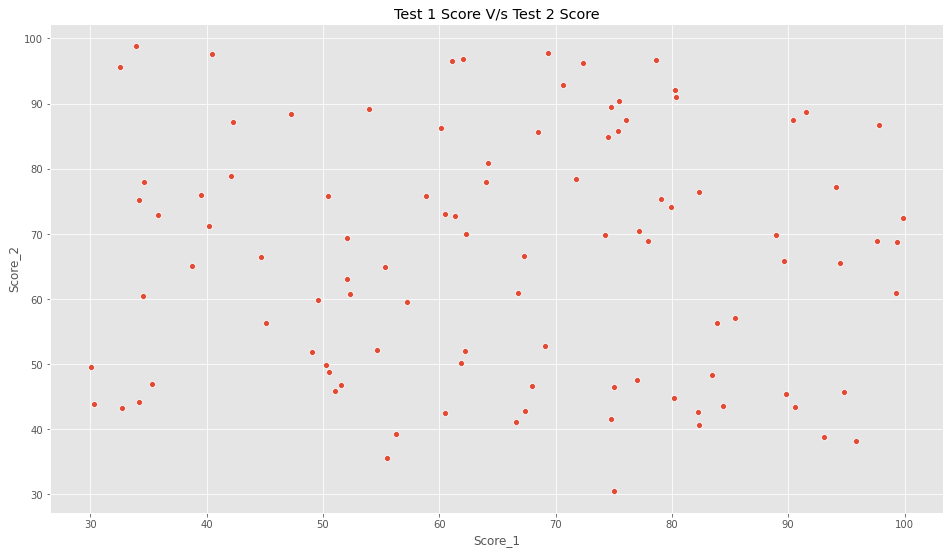

In [5]:
ax = sns.scatterplot(x='Score_1', y='Score_2', data=data)
ax.set_title("Test 1 Score V/s Test 2 Score")

This is diagram below represents the result on the basis of marks scored in test 1 and test 2.

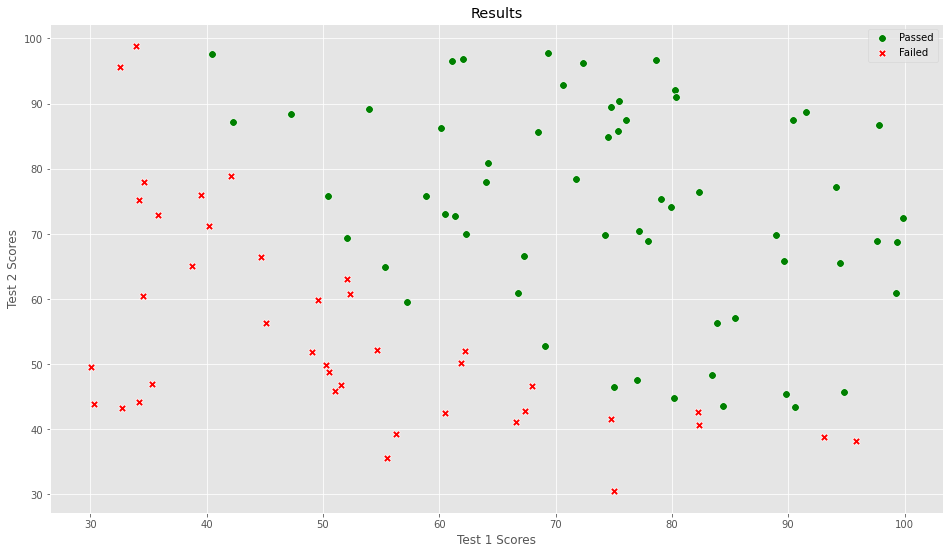

In [6]:
scores = data[['Score_1', 'Score_2']].values
results = data['Result'].values

passed = (data.Result.values == 1).reshape(100, 1)
failed = (data.Result.values == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "o",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)


ax.set(xlabel="Test 1 Scores", ylabel="Test 2 Scores")
ax.legend(["Passed", "Failed"])
ax.set_title("Results")
plt.show()

### Sigmoid Function

A $sigmoid function$ (Logistic Function) is a bounded, differentiable, real function that is defined for all real input values and has a range of (0, 1).

It is used to calculate the probability of an object belonging to a certain class.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

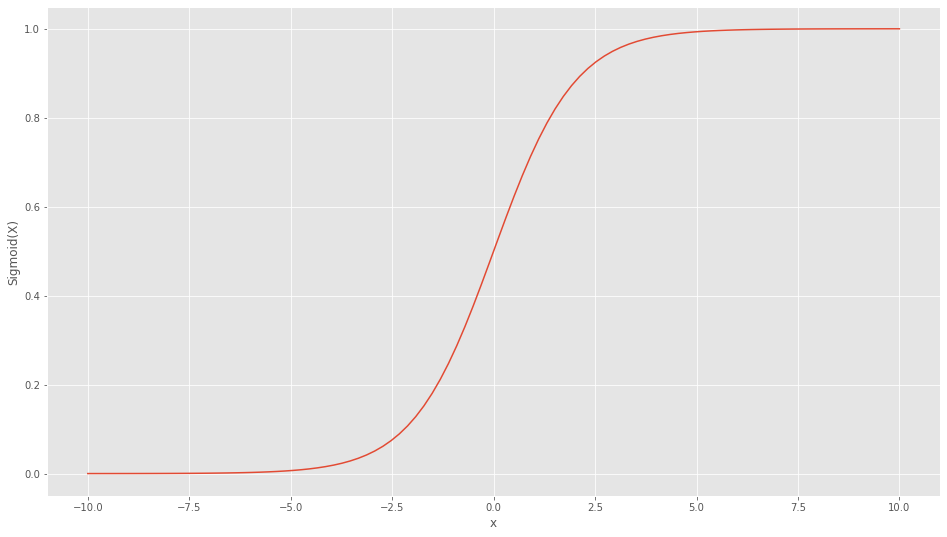

In [8]:
x_axis = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x_axis)) 
  
plt.plot(x_axis, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

###  Compute the Cost $J(\omega)$
---

The objective of logistic regression is to minimize the cost function

$$J(\omega) = -\frac{1}{m} \sum_{i=1}^{m} [ y_i * log(h_{\omega}(x_i)) + (1 - y_i) * log(1 - (h_{\omega}(x_i))]$$

where $h_{\omega}(x)$ is the hypothesis and given by the linear model

$$h_{\omega}(x) = \omega_0 + \omega_1x_1$$

In [9]:
def cost_function(X, y, omega):
    m = len(y)
    y_pred = sigmoid(np.dot(X , omega))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(X.transpose(), (y_pred - y))
    return cost[0] , gradient

### Standardisation

Standardization refers to the process of subtracting the mean and dividing by the standard deviation.

$$ Z = \frac{x - \mu}{\sigma} $$

In [10]:
#Standardisation
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

In [11]:
rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

omega = np.zeros((cols + 1, 1))
cost, gradient = cost_function(X, y, omega)

### Gradient Descent
---

The gradient of the cost function is given by

$$ \frac{\partial J(\omega)}{\partial \omega} = \frac{1}{m} \sum_{i=1}^{m} (h_{\omega}(x_i) - y_i)x_i$$


Minimize the cost function $J(\omega)$ by updating the below equation and repeat until convergence, simultaneously updating $\omega_j$ for all $j$


$$\omega := \omega - \alpha \frac{\partial J(\omega)}{\partial \omega}$$ 

In [12]:
def gradient_descent(x, y, omega, alpha, epochs):
    costs = []
    for i in range(epochs):
        cost, gradient = cost_function(x, y, omega)
        omega -= (alpha * gradient)
        costs.append(cost)
    return omega, costs

In [13]:
omega, costs = gradient_descent(X, y, omega, 1, 200)

### Plotting the Convergence of $J(\omega)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

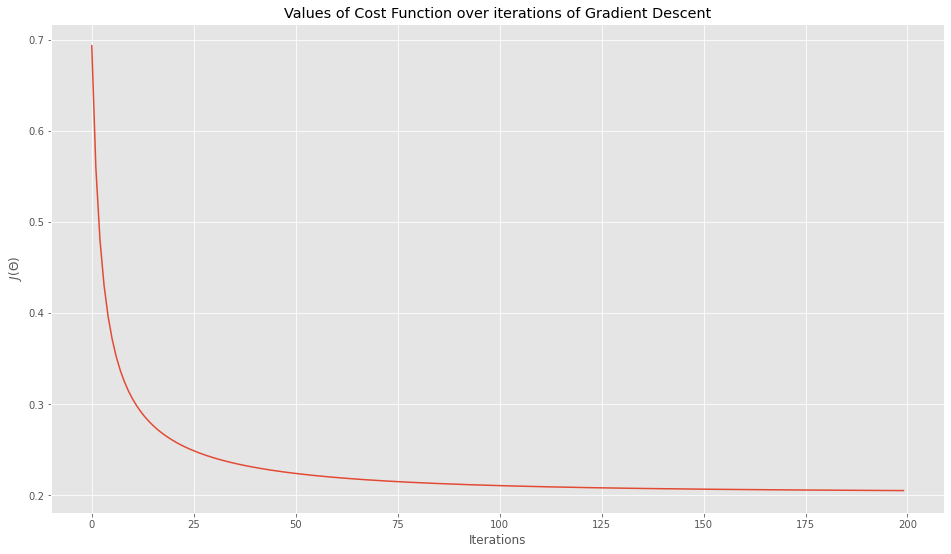

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision Boundary

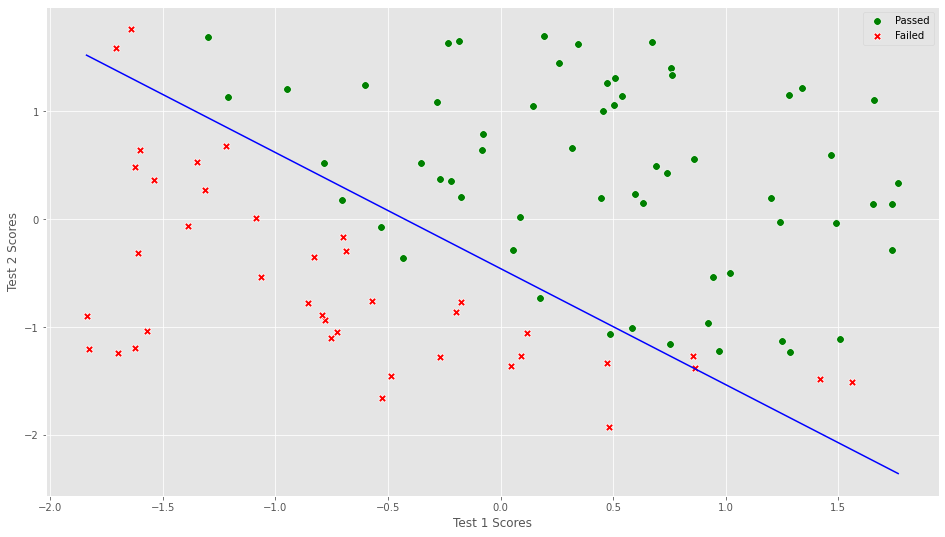

In [15]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "o",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="Test 1 Scores", ylabel="Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(omega[0] + omega[1] * x_boundary) / omega[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Predicting Result using optimized $\omega$ values
---

In [16]:
def predict(omega, x):
    results = x.dot(omega)
    return results > 0

In [17]:
test = np.array([64,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = sigmoid(test.dot(omega))
print("A person who scores 64 and 79 in their tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 64 and 79 in their tests have a 0.97 probability of passing.
